# ESERCIZIO 2: Person Gender Height Weight Index 15/10
* * *

+ **Importo le librerie**

In [1]:
import numpy as np
import pandas as pd

+ **Scarico il dataset e lo visualizzo**

In [2]:
df = pd.read_csv(r"C:/Users/Utente/Desktop/data/Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
#per maggiori informazioni utilizzo anche print, è molto lungo quindi non viene visualizzato per intero.
print("DATAFRAME \n", df)

DATAFRAME 
      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


+ **calcolare l’indice di massa corporea (Body Mass Index – BMI). BMI si calcola facendo il peso (in kg.) diviso l'altezza (in m.) al quadrato. (BMI=peso (in kg.)/(altezza (in m.) elevato alla 2)**

In [4]:
bmi = df['Weight']/(df['Height']/100)**2
bmi.head()

0    31.708284
1    24.355421
2    32.140248
3    27.350427
4    27.476240
dtype: float64

+ **Dal dataset originale, creare un nuovo dataset bmi_ds selezionando solo le colonne che ci interessano corrispondenti a genere, peso e altezza (vedere funzione pd.DataFrame e parametro columns). Poi salvare bmi_ds come csv in locale**

In [5]:
bmi_ds = pd.DataFrame(data=df, columns = ['Gender','Height','Weight'])
bmi_ds.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [6]:
bmi_ds.to_csv('ES2_BMI_DS') #salvato in locale

+ **Aggiungere una nuova colonna, che chiamiamo BMI, nel dataset bmi_ds, che avrà per ogni riga il risultato del calcolo del BMI di quella persona. Poi salvare il csv.**

In [7]:
pd.DataFrame(data=bmi_ds,columns=['Gender', 'Height', 'Weight', 'BMI'])
bmi_ds['BMI'] = bmi_ds['Weight']/(bmi_ds['Height']/100)**2

bmi_ds.head()

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240


In [8]:
bmi_ds.to_csv('ES2_BMI_DS') #salvato in locale

+ **Per prima cosa riproducete una visualizzazione di tipo bar chart come visto nel precedente esercizio usando la funzione histplot di seaborn.**

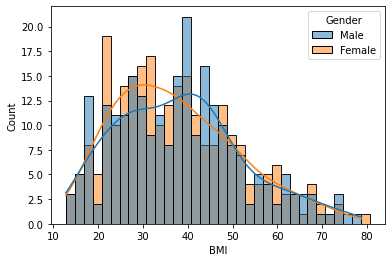

In [9]:
import seaborn
seaborn.histplot(data=bmi_ds, x='BMI', binwidth=2, bins=30, stat="count", hue="Gender", kde="true", legend=True);

+ **Prima di tutto pensare a che tipo di relazione rappresentare ricordando che se metto in relazione due variabili, x è la variabile indipendente e y quella dipendente, quindi quello che si mostra risponde a "Come varia y al variare di x?". Ad esempio, Come varia l’altezza al variare del peso? Viceversa, se uso una sola variabile, questa sarà sulle x, mentre sulle y ci sarà il valore della variabile per ogni riga del dataset.**
Variabile indipendente per eccellenza è sicuramente il genere perché non dipende da altre variabili in alcun modo. Altezza e peso possono essere in relazione, a rigor di logica aumentando l'altezza aumenterà anche il peso (ma non è detto). La variabile dipendente sicura è quindi una sola: l'indice BMI, che dipende appunto da altezza e peso ma che può anche variare a seconda del genere, come nel grafico sopra.

+ **Ad esempio, Visualizzare tutti i valori di BMI dei 500 individui, colorati diversamente per uomini e donne (tipico uno scatterplot). Oppure ho visualizzazioni che contano quante righe hanno lo stesso valore di una variabile, ad esempio Quanti hanno BMI tra 10 e 20, quanti tra 20 e 30, quanti tra 30 e 40 etc. (questo è il caso tipico dei bar chart o dei box plot, violin plot)**

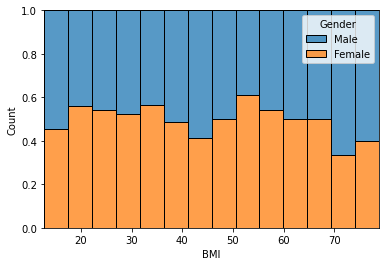

In [10]:
seaborn.histplot(data=bmi_ds, x='BMI', hue="Gender", multiple="fill", legend="auto")

+ **provare i diversi parametri, ad esempio cambiare numero o dimensione dei bin, provare a utilizzare colori e diversi elementi del tema grafico, orientamento degli assi, usate Gender per avere due bar chart divisi per sesso, (es. hue="Gender”)**

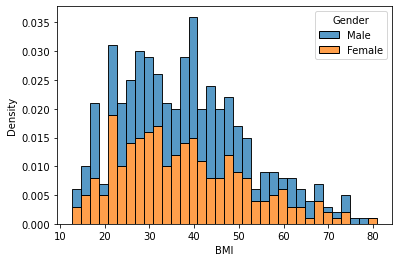

In [11]:
seaborn.histplot(data=bmi_ds, x='BMI', bins=10, binwidth=2, hue="Gender", multiple="stack", stat="density", legend="auto")

+ **guardare la combinazione tra le funzioni FacetGrid e map per avere facets (ad esempio grafici separati per uomini e donne)**

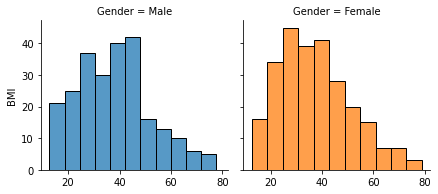

In [12]:
g = seaborn.FacetGrid(data=bmi_ds, col="Gender", hue="Gender")
g.map_dataframe(seaborn.histplot, "BMI")
g.set_axis_labels("", "BMI")

+ **provare a creare altri tipi di visualizzazioni (esempio, scatterplot (fondamentale), linechart, boxplot, violin)**

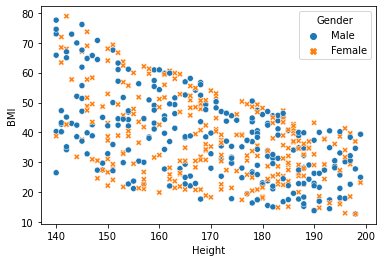

In [13]:
seaborn.scatterplot(data=bmi_ds, x='Height', y='BMI', style='Gender', hue='Gender', legend='auto')
#scatterplot

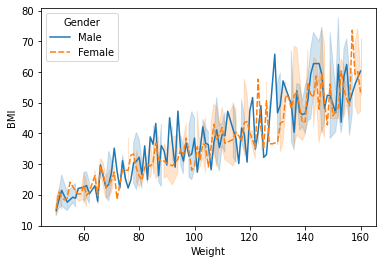

In [14]:
seaborn.lineplot(data=bmi_ds, x='Weight', y='BMI', hue='Gender', style='Gender', legend='auto')

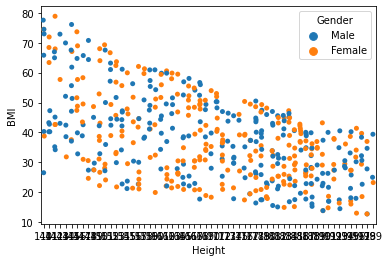

In [16]:
seaborn.stripplot(data=bmi_ds, x='Height', y='BMI', hue='Gender', orient='v') #simile a scatterplot e swarmplot

+ **Eseguire un boxplot**

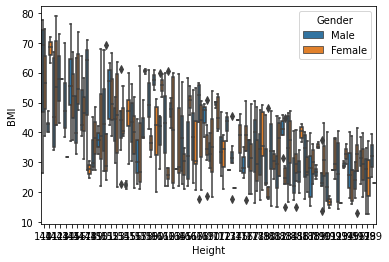

In [17]:
seaborn.boxplot(data=bmi_ds, x='Height', y='BMI', hue='Gender') #la visualizzazione non è delle migliori, vedere punto successivo

+ **Vedere la funzione qcut di pandas per spezzare in quantili una sequenza di valori. Provare la differenza tra qcut e cut** La differenza tra i due sta nei valori degli intervalli: qcut consente di dividere i dagti in quartili con uguale numero di valori. Cut invece non crea gruppi di eguale valore.

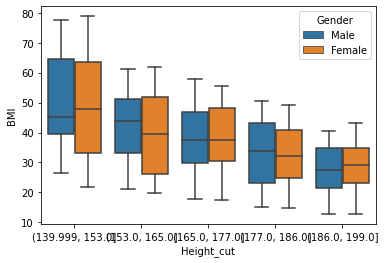

In [18]:
bmi_ds['Height_cut'] = pd.qcut(bmi_ds.Height, q=5)
seaborn.boxplot(data=bmi_ds, x='Height_cut', y='BMI', hue='Gender')

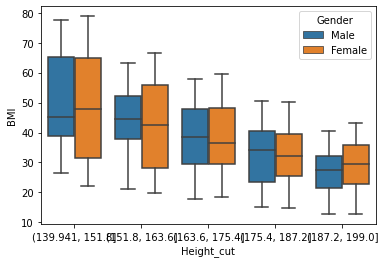

In [19]:
bmi_ds['Height_cut'] = pd.cut(bmi_ds.Height, bins=5)
seaborn.boxplot(data=bmi_ds, x='Height_cut', y='BMI', hue='Gender')

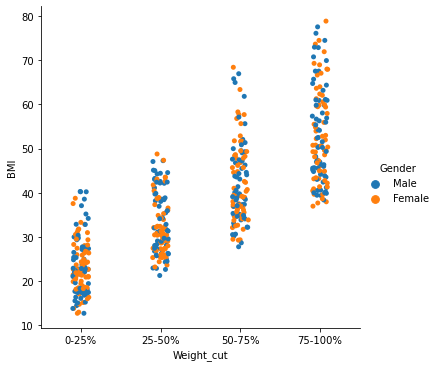

In [20]:
bmi_ds['Weight_cut'] = pd.qcut(bmi_ds.Weight, 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"])
seaborn.catplot(data=bmi_ds, x='Weight_cut', y='BMI', hue='Gender')

+ **Ora che si sono provati diversi tipi di visualizzazioni e si è familiarizzato con le funzioni, si pensi ai contenuti e all’informazione che si ricava dai dati. Abbiamo: genere, peso, altezza e BMI. Pensare a una visualizzazione che dica qualcosa di utile.**

## VISUALIZZAZIONE PER OGNI CATEGORIA DI PESO COMPARATA PER GENERE
***

In [21]:
pd.to_numeric(bmi_ds['BMI'])                                   
Obesità = bmi_ds.loc[(bmi_ds['BMI']>=40)]
Sovrappeso = bmi_ds.loc[(bmi_ds['BMI']<40) & (bmi_ds['BMI']>= 25)]
Regolare = bmi_ds.loc[(bmi_ds['BMI']<25) & (bmi_ds['BMI']>=18.51)]
Sottopeso = bmi_ds.loc[(bmi_ds['BMI']<18.51)]
bmi_ds.head()

,Gender,Height,Weight,BMI,Height_cut,Weight_cut
0,Male,174,96,31.708284,"(163.6, 175.4]",25-50%
1,Male,189,87,24.355421,"(187.2, 199.0]",25-50%
2,Female,185,110,32.140248,"(175.4, 187.2]",50-75%
3,Female,195,104,27.350427,"(187.2, 199.0]",25-50%
4,Male,149,61,27.476240,"(139.941, 151.8]",0-25%


In [22]:
print("Numero persone obese \n", Obesità['Gender'].count())

Numero persone obese 
 202


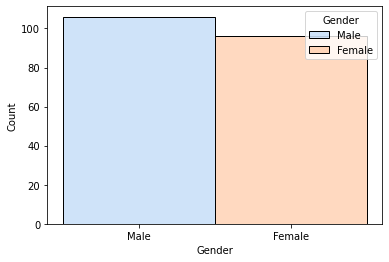

In [23]:
seaborn.histplot(data= Obesità, x='Gender', hue="Gender", element="bars", palette="pastel")

In [24]:
print("Numero persone sovrappeso \n", Sovrappeso['Gender'].count())

Numero persone sovrappeso 
 198


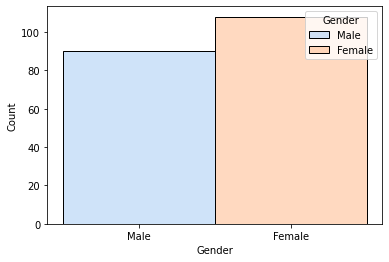

In [25]:
seaborn.histplot(data= Sovrappeso, x='Gender', hue="Gender", element="bars", palette="pastel")

In [26]:
print("Numero persone con peso regolare \n", Regolare['Gender'].count())

Numero persone con peso regolare 
 66


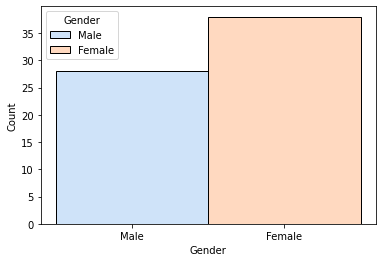

In [27]:
seaborn.histplot(data= Regolare, x='Gender', hue="Gender", element="bars", palette="pastel")

In [28]:
print("Numero persone con sottopeso \n", Sottopeso['Gender'].count())

Numero persone con sottopeso 
 34


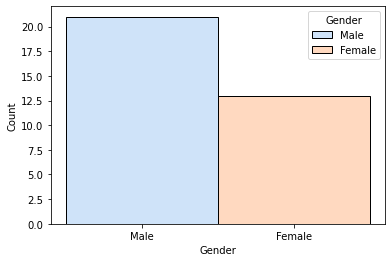

In [29]:
seaborn.histplot(data= Sottopeso, x='Gender', hue="Gender", element="bars", palette="pastel")